**Employee Attrition Analysis**

📊 Problem Statement:

1. The high rate of employee attrition can have significant implications for organizations, leading to increased recruitment and training costs, reduced productivity, and decreased employee morale.

2. It is crucial for companies to understand the underlying factors contributing to attrition and take proactive measures to address them.

Attrition in an Organization || Why Workers Quit?
Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

-Expensive in terms of both money and time to train new employees.

-Loss of experienced employees

-Impact in productivity

-Impact profit

----------------------------------------------------


📌 Business questions to brainstorm:

-What factors are contributing more to employee attrition?

-What type of measures should the company take in order to retain their employees?

-What business value does the model bring?

-Will the model save lots of money?

-Which business unit faces the attrition problem?

In [1]:
import hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [2]:
df1 = pd.read_csv("train.csv")
df1.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
977,34,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,1374,1,Female,92,2,1,Research Scientist,3,Divorced,2029,15891,1,Y,No,20,4,3,80,3,5,2,3,5,4,0,0
490,38,No,Travel_Rarely,362,Research & Development,1,1,Life Sciences,1,662,3,Female,43,3,1,Research Scientist,1,Single,2619,14561,3,Y,No,17,3,4,80,0,8,3,2,0,0,0,0
327,39,Yes,Travel_Rarely,1162,Sales,3,2,Medical,1,445,4,Female,41,3,2,Sales Executive,3,Married,5238,17778,4,Y,Yes,18,3,1,80,0,12,3,2,1,0,0,0
885,25,No,Travel_Rarely,1356,Sales,10,4,Life Sciences,1,1240,3,Male,57,3,2,Sales Executive,4,Single,4950,20623,0,Y,No,14,3,2,80,0,5,4,3,4,3,1,1
1110,35,Yes,Travel_Rarely,104,Research & Development,2,3,Life Sciences,1,1569,1,Female,69,3,1,Laboratory Technician,1,Divorced,2074,26619,1,Y,Yes,12,3,4,80,1,1,2,3,1,0,0,0


📊 Exploratory Data Analysis:

1.Univariate analysis:

-Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread

-Categorical variable : Bar chart showing frequency in each category



2.Bivariate analysis:

-Continous & Continous : Scatter plots to know how continous variables interact with each other

-Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
categorical variables

-Categorical & Continous : Boxplots, Swamplots or even bar charts



3.Detect outliers

4.Feature engineering

In [3]:
df1.shape

(1470, 35)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Step 3: Split the data into features and target
X = df1.drop('Attrition', axis=1)  # Assuming 'Attrition' is the target column
y = df1['Attrition']

# Step 4: Check the distribution of the target variable
print(y.value_counts())

# Step 5: Identify the minority and majority classes
majority_class = y.value_counts().idxmax()
minority_class = y.value_counts().idxmin()

print(f'Majority class: {majority_class}')
print(f'Minority class: {minority_class}')

No     1233
Yes     237
Name: Attrition, dtype: int64
Majority class: No
Minority class: Yes


In [6]:
# Step 6: Separate the minority and majority classes
df_majority = df1[df1['Attrition'] == majority_class]
df_minority = df1[df1['Attrition'] == minority_class]

# Step 7: Determine how many more samples are needed to balance the classes
samples_needed = len(df_majority) - len(df_minority)

# Step 8: Duplicate the minority class samples
df_minority_oversampled = df_minority.sample(n=samples_needed, replace=True, random_state=42)

# Step 9: Combine the oversampled minority class with the original data
df_oversampled = pd.concat([df_majority, df_minority, df_minority_oversampled])

# Step 10: Shuffle the DataFrame to mix the oversampled data
df = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 11: Display the new class distribution
print(df['Attrition'].value_counts())

No     1233
Yes    1233
Name: Attrition, dtype: int64


In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,No,Travel_Frequently,766,Sales,20,3,Life Sciences,1,1812,3,Male,83,3,2,Sales Executive,4,Divorced,4127,19188,2,Y,No,18,3,4,80,1,7,6,3,2,1,2,2
1,52,Yes,Travel_Rarely,723,Research & Development,8,4,Medical,1,433,3,Male,85,2,2,Research Scientist,2,Married,4941,17747,2,Y,No,15,3,1,80,0,11,3,2,8,2,7,7
2,35,No,Travel_Rarely,802,Research & Development,10,3,Other,1,1028,2,Male,45,3,1,Laboratory Technician,4,Divorced,3917,9541,1,Y,No,20,4,1,80,1,3,4,2,3,2,1,2
3,32,Yes,Travel_Rarely,414,Sales,2,4,Marketing,1,1862,3,Male,82,2,2,Sales Executive,2,Single,9907,26186,7,Y,Yes,12,3,3,80,0,7,3,2,2,2,2,2
4,19,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,1,566,1,Male,52,2,1,Human Resources,4,Single,2564,18437,1,Y,No,12,3,3,80,0,1,3,4,1,0,0,0


In [8]:
df['Attrition'].value_counts()

No     1233
Yes    1233
Name: Attrition, dtype: int64

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00,2466.00
mean,35.64,787.03,9.61,2.89,1.00,1031.03,2.61,65.71,2.64,1.90,2.64,5822.55,14277.48,2.81,15.19,3.16,2.66,80.00,0.69,10.05,2.74,2.73,6.29,3.69,2.05,3.61
std,9.51,404.30,8.26,1.01,0.00,591.49,1.14,20.26,0.75,1.07,1.12,4430.83,7156.09,2.60,3.72,0.36,1.09,0.00,0.87,7.81,1.24,0.74,6.22,3.53,3.15,3.48
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,29.00,436.00,2.00,2.00,1.00,508.50,2.00,48.00,2.00,1.00,2.00,2600.00,8271.00,1.00,12.00,3.00,2.00,80.00,0.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00
50%,34.00,756.00,7.00,3.00,1.00,1038.00,3.00,66.00,3.00,2.00,3.00,4379.00,14255.00,1.00,14.00,3.00,3.00,80.00,0.00,8.00,3.00,3.00,5.00,2.00,1.00,2.00
75%,42.00,1141.00,15.00,4.00,1.00,1544.75,4.00,84.00,3.00,2.00,4.00,7336.00,20644.75,4.00,18.00,3.00,4.00,80.00,1.00,13.00,3.00,3.00,9.00,7.00,2.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [10]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that - 'EmployeeCount',  'Over18',  'StandardHours' 

have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [11]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [12]:
# Categorical Features
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['No' 'Yes']
No     1233
Yes    1233
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Travel_Rarely        1703
Travel_Frequently     558
Non-Travel            205
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1481
Sales                      853
Human Resources            132
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Medical' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       990
Medical             702
Marketing           316
Technical Degree    253
Other               136
Human Resources      69
Name: EducationField, dtype: int64
Gender : ['Male' 'Female']
Male      1496
Female     970
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Human Resources' 'Manager' 'Sales Representative' 'Research Director'
 'Healthcare Representative' 'Manufact

In [13]:
len(object_col)

7

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [15]:
# Numerical Features
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [0 1]
DistanceFromHome : [20  8 10  2  3  5  4  9  7  1 29 24 18 27 11 26 25 13  6 23 28 12 17 19
 16 15 14 21 22]
Education : [3 4 2 5 1]
EnvironmentSatisfaction : [3 2 1 4]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 5 4 3]
JobSatisfaction : [4 2 1 3]
NumCompaniesWorked : [2 1 7 4 3 0 9 8 5 6]
PercentSalaryHike : [18 15 20 12 25 13 11 14 22 23 19 16 17 21 24]
PerformanceRating : [3 4]
RelationshipSatisfaction : [4 1 3 2]
StockOptionLevel : [1 0 2 3]
TrainingTimesLastYear : [6 3 4 2 5 1 0]
WorkLifeBalance : [3 2 4 1]
YearsInCurrentRole : [ 1  2  0  7  5  3  8 12  6  4 10 11 16  9 15 13 14 17 18]
YearsSinceLastPromotion : [ 2  7  1  0 14  3  5  6 12 11  4 13 15  8  9 10]
YearsWithCurrManager : [ 2  7  0  3  9 10  6  8  4 13  1  5 14 11 12 15 17 16]


In [16]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [ ]:
# Data Visualisation
df.hvplot.hist(y='DistanceFromHome',
               by='Attrition',
               subplots=False,
               width=600,
               height=300,
               bins=30)

In [ ]:
df.hvplot.hist(y='Education',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='RelationshipSatisfaction',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='EnvironmentSatisfaction',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='JobInvolvement',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='JobLevel',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='JobSatisfaction',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='NumCompaniesWorked',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='PercentSalaryHike',
               by='Attrition',
               subplots=False,
               width=600,
               height=300)

In [ ]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

In [ ]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

📌 Note:
It seems that below features don't have big impact on the detrmination of Attrition of employees.

EnvironmentSatisfaction, 

JobSatisfaction, 

PerformanceRating, 

RelationshipSatisfaction

**Analysis of graphs**

-Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.

-As income increases, attrition decreases.

-Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.

-Attrition is the highest for those in level 1 jobs.

-Women with the job position of manager, research director and technician laboratory have almost no attrition.

-Men with the position of sales expert have a lot of attrition.

In [ ]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

In [ ]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

In [ ]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

In [ ]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

In [ ]:
# How Is Attrition Affected by business travels?
# Histogram for BusinessTravel
sns.histplot(data=df, x='BusinessTravel', element='step', color='#EEB422', stat='percent')

In [ ]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette=["#7FFF00","#458B00"])

In [ ]:
# what is effect of the distance from home on attrition ?
sns.displot(df, x="DistanceFromHome", hue="Attrition", kind="kde")

In [ ]:
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette=["#7FFF00","#458B00"])

In [ ]:
# Does the Department of work impact attrition What is the most Department of attritions ?
# px.sunburst(df, path=['Department', 'Attrition'], height=650).update_traces(textinfo="label+percent parent")
sns.countplot(df , x = 'Department',hue = 'EducationField' , color="#808000")
plt.xticks(rotation = 45);


📝 Conclusions:

**The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs**

-BusinessTravel : The workers who travel alot are more likely to quit then other employees.

-Department : The worker in Research & Development are more likely to stay then the workers on other departement.

-EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

-Gender : The Male are more likely to quit.

-JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

-MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

-OverTime : The workers who work more hours are likely to quit then others.

In [17]:
# Data Processing
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 469.7 KB


In [18]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(2466, 136)
(1470, 136)


In [19]:
data.shape

(1470, 136)

In [ ]:
# data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [20]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

**Applying Machine learning Algorithms**

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = data.drop('Attrition', axis=1)
y = data.Attrition
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [22]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [23]:
y_test.value_counts()[0] / y_test.shape[0]

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

**Logistic Regression**

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [26]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[844  19]
 [ 62 104]]
ACCURACY SCORE:
0.9213
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.93   0.85      0.92       0.89          0.92
recall      0.98   0.63      0.92       0.80          0.92
f1-score    0.95   0.72      0.92       0.84          0.92
support   863.00 166.00      0.92    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[353  17]
 [ 37  34]]
ACCURACY SCORE:
0.8776
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.91  0.67      0.88       0.79          0.87
recall      0.95  0.48      0.88       0.72          0.88
f1-score    0.93  0.56      0.88       0.74          0.87
support   370.00 71.00      0.88     441.00        441.00


In [ ]:
# from sklearn.metrics import precision_recall_curve, roc_curve

# def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
#     plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
#     plt.xlabel("Threshold")
#     plt.legend(loc="upper left")
#     # plt.title("Precision/Recall Tradeoff")
    

# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], "k--")
#     plt.axis([0, 1, 0, 1])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
    
    
# precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
# plt.figure(figsize=(14, 25))
# plt.subplot(4, 2, 1)
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# plt.subplot(4, 2, 2)
# plt.plot(precisions, recalls)
# plt.xlabel("Precision")
# plt.ylabel("Recall")
# plt.title("PR Curve: precisions/recalls tradeoff");

# plt.subplot(4, 2, 3)
# fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
# plot_roc_curve(fpr, tpr)

In [27]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

**Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 62   9]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.64      0.85       0.75          0.82
recall      0.99  0.13      0.85       0.56          0.85
f1-score    0.92  0.21      0.85       0.56          0.80
support   370.00 71.00      0.85     441.00        441.00


In [30]:
param_grid = dict(n_estimators=[100, 500, 900],
                  max_features=['auto', 'sqrt'],
                  max_depth=[5, 10, 15, None],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[1, 2, 4],
                  bootstrap=[True, False])

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=5,
                      verbose=1,
                      n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 33 133]]
ACCURACY SCORE:
0.9679
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.97       0.98          0.97
recall      1.00   0.80      0.97       0.90          0.97
f1-score    0.98   0.89      0.97       0.94          0.97
support   863.00 166.00      0.97    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[368   2]
 [ 61  10]]
ACCURACY SCORE:
0.8571
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.83      0.86       0.85          0.85
recall      0.99  0.14      0.86       0.57          0.86
f1-score    0.92  0.24      0.86       0.58          0.81
support   370.00 71.00      0.86     441.00        441.00


In [ ]:
# precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
# plt.figure(figsize=(14, 25))
# plt.subplot(4, 2, 1)
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# plt.subplot(4, 2, 2)
# plt.plot(precisions, recalls)
# plt.xlabel("Precision")
# plt.ylabel("Recall")
# plt.title("PR Curve: precisions/recalls tradeoff");

# plt.subplot(4, 2, 3)
# fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
# plot_roc_curve(fpr, tpr)

In [31]:
scores_dict = {}
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

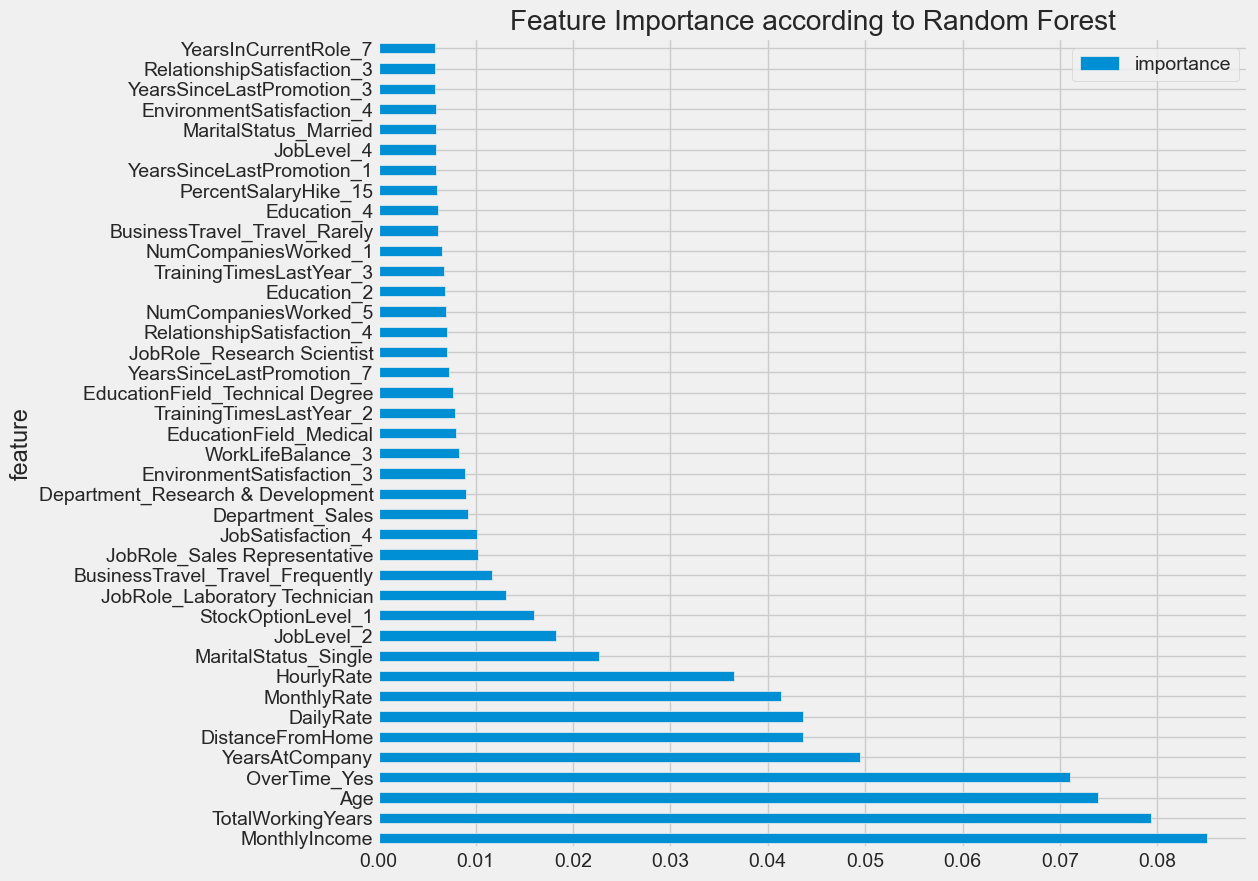

In [32]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

**XGB Classifier**

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train_std, y_train)

evaluate(xgb_clf, X_train_std, X_test_std, y_train, y_test)

In [ ]:
# %pip install xgboost

In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [ ]:
# precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
# plt.figure(figsize=(14, 25))
# plt.subplot(4, 2, 1)
# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# plt.subplot(4, 2, 2)
# plt.plot(precisions, recalls)
# plt.xlabel("Precision")
# plt.ylabel("Recall")
# plt.title("PR Curve: precisions/recalls tradeoff");

# plt.subplot(4, 2, 3)
# fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
# plot_roc_curve(fpr, tpr)

This curve is a way to evaluate the performance of a model that classifies data points into different categories. In the case of employee attrition, the model would be trying to classify employees into two groups: those who will leave (attrition) and those who will stay.

The PR curve plots the precision on the y-axis and the recall on the x-axis. Precision is the ratio of true positives (correctly identified employees who leave) to the total number of positive predictions (all the employees the model predicted would leave). Recall is the ratio of true positives to the total number of actual positives (all the employees who actually leave the company).



**Comparing Models Prerformance**

In [ ]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

In [ ]:
scores_df = pd.DataFrame(scores_dict)
# scores_df.plot(kind='barh', figsize=(15, 8))
scores_df.hvplot.barh()

- correlated result - requires
- how many people join the competitor


In [ ]:
X = df1.drop(columns='Attrition')
y = df1['Attrition']